In [1]:
import torch
import torch.nn as nn 
import Dataset
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import Model
import TrainModel

In [2]:
data_lodaer_dict = Dataset.GetDataLoaderDict()
test_loader = Dataset.GetTestDataLoader()
model = Model.Classifier()


In [3]:
def WriteDictToCsv(csv_file:str,res:dict):
    '''
    saves the results to a csv file
    '''
    df = pd.DataFrame.from_dict(res, orient='columns')
    df.to_csv(csv_file)
    

def LoadCsvAndShowRes(file_name):
    df =  pd.read_csv(file_name)
    df.drop(df.columns[[0]], axis=1).plot()



In [4]:
criterion = nn.BCEWithLogitsLoss()
metrics_train_dict , metrics_val_dict ,metrics_test_dict = TrainModel.TrainClassifier(data_lodaer_dict,
                                                                                      model,criterion
                                                                                      ,test_loader=test_loader)

WriteDictToCsv('train_states.csv',metrics_train_dict)
WriteDictToCsv('val_states.csv',metrics_val_dict)

WriteDictToCsv('test_states.csv',metrics_test_dict)

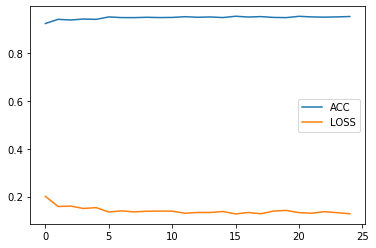

In [5]:
LoadCsvAndShowRes('train_states.csv')

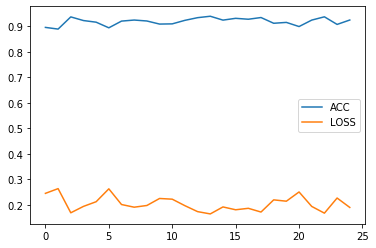

In [6]:
LoadCsvAndShowRes('val_states.csv')

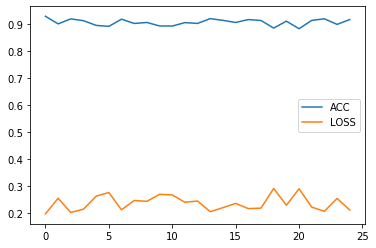

In [7]:
LoadCsvAndShowRes('test_states.csv')

In [8]:
#for name, param in model.named_parameters():
    #print(f'{name} {param.requires_grad}')